In [1]:
!nvidia-smi

Thu Apr  8 01:22:22 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla V100-PCIE...  On   | 00000000:00:05.0 Off |                  Off |
| N/A   36C    P0    27W / 250W |      0MiB / 32480MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/opt/ml/input/data/train/train.csv')
df.drop("race", axis=1, inplace=True)

In [4]:
df["gender_code"] = df.gender.map({"female":3, "male":0})
df

,id,gender,age,path,gender_code
0,000001,female,45,000001_female_Asian_45,3
1,000002,female,52,000002_female_Asian_52,3
2,000004,male,54,000004_male_Asian_54,0
3,000005,female,58,000005_female_Asian_58,3
4,000006,female,59,000006_female_Asian_59,3
...,...,...,...,...,...
2695,006954,male,19,006954_male_Asian_19,0
2696,006955,male,19,006955_male_Asian_19,0
2697,006956,male,19,006956_male_Asian_19,0
2698,006957,male,20,006957_male_Asian_20,0


In [5]:
df["age_code"] = df.age.map(lambda x: 0 if x<30 else (1 if x<58 else 2)
)
df["age+gender"] = df["age_code"] + df["gender_code"]
df


,id,gender,age,path,gender_code,age_code,age+gender
0,000001,female,45,000001_female_Asian_45,3,1,4
1,000002,female,52,000002_female_Asian_52,3,1,4
2,000004,male,54,000004_male_Asian_54,0,1,1
3,000005,female,58,000005_female_Asian_58,3,2,5
4,000006,female,59,000006_female_Asian_59,3,2,5
...,...,...,...,...,...,...,...
2695,006954,male,19,006954_male_Asian_19,0,0,0
2696,006955,male,19,006955_male_Asian_19,0,0,0
2697,006956,male,19,006956_male_Asian_19,0,0,0
2698,006957,male,20,006957_male_Asian_20,0,0,0


In [6]:
df.to_csv('/opt/ml/input/data/train/train_2.csv', # file path, file name
    sep=',',   # seperator, delimiter (구분자)
    na_rep='NaN')   # missing data representation (결측값 표기)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           2700 non-null   object
 1   gender       2700 non-null   object
 2   age          2700 non-null   int64 
 3   path         2700 non-null   object
 4   gender_code  2700 non-null   int64 
 5   age_code     2700 non-null   int64 
 6   age+gender   2700 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 147.8+ KB


In [8]:
df.describe()

,age,gender_code,age_code,age+gender
count,2700.000000,2700.000000,2700.000000,2700.000000
mean,37.708148,1.842222,0.687037,2.529259
std,16.985904,1.460710,0.733607,1.664160
min,18.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,1.000000
50%,36.000000,3.000000,1.000000,3.000000
75%,55.000000,3.000000,1.000000,4.000000
max,60.000000,3.000000,2.000000,5.000000


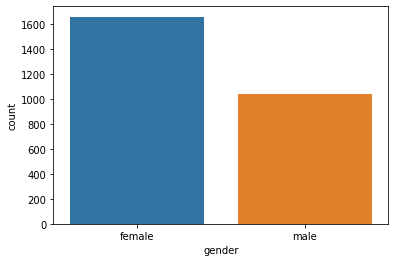

In [9]:
sns.countplot(x="gender", data=df)

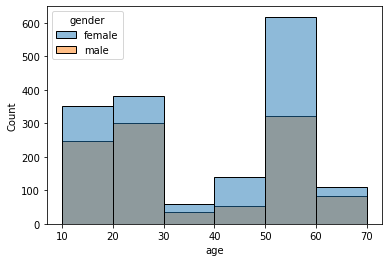

In [10]:
sns.histplot(x="age", data=df, hue="gender", binrange=(10,70), binwidth=10, hue_order=("female", "male"))

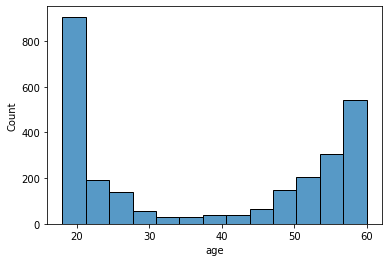

In [11]:
sns.histplot(x="age", data=df)

In [12]:
s1 = df["age+gender"].value_counts().sort_index(ascending=True) * 5
s2 = df["age+gender"].value_counts().sort_index(ascending=True)
s3 = df["age+gender"].value_counts().sort_index(ascending=True)

In [13]:
s2.index = list([6, 7, 8, 9, 10, 11])
s3.index = list([12, 13, 14, 15, 16, 17])

In [14]:
df_class = pd.concat([s1, s2, s3])
df_class = df_class.to_frame()
df_class.reset_index(inplace=True)
df_class.columns = ["class", "count"]
df_class.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
class,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,2745,1570,895,3660,3345,1285,549,314,179,732,669,257,549,314,179,732,669,257


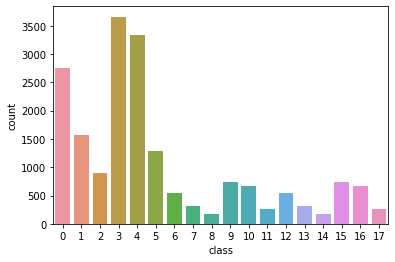

In [15]:
sns.barplot(x = "class", y = "count", data = df_class)

In [16]:
# labels=df_class['count'].value_counts().index
# values=df_class['count'].value_counts().values

# ax = sns.barplot(x=labels, y=values)
# for i, p in enumerate(ax.patches):
#     height = p.get_height()
#     ax.text(p.get_x()+p.get_width()/2., height + 0.1, values[i],ha="center")